# 0. Utilities & Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [41]:
# Select a few columns
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# EDA

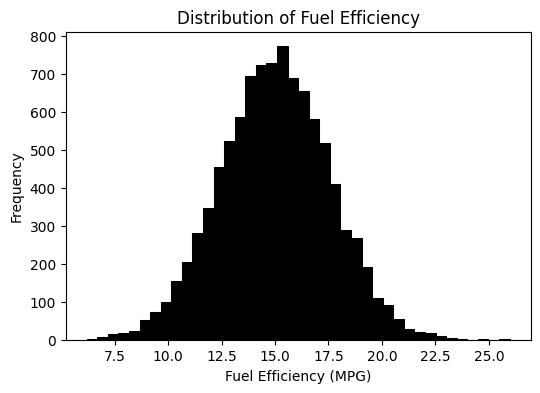

In [42]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency (MPG)')
plt.title('Distribution of Fuel Efficiency')
plt.show()

**Answer**: No long tail spotted!

# 1. Missing Values
There's one column with missing values. What is it?

In [43]:
print(df.columns[df.isna().any()])

Index(['horsepower'], dtype='object')


# 2 Median HP
What's the median (50% percentile) for variable 'horsepower'?

In [44]:
print(np.median(df['horsepower'].dropna())) 

149.0


# Split the dataset

In [45]:
np.random.seed(42)
n = len(df)
idx = np.arange(n)
# print(idx)

# Shuffle the ds idx
np.random.shuffle(idx)
# print(idx)

In [46]:
# 60/20/20 distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# 3. Filling N/A

In [47]:
# Fill with 0s
df_train_0 = df_train.fillna({'horsepower': 0})
df_val_0 = df_val.fillna({'horsepower': 0})
df_test_0 = df_test.fillna({'horsepower': 0})

# Fill with mean
train_mean_hp = df_train['horsepower'].mean()
df_train_mean = df_train.fillna({'horsepower': train_mean_hp})
df_val_mean   = df_val.fillna({'horsepower': train_mean_hp})
df_test_mean  = df_test.fillna({'horsepower': train_mean_hp})

In [48]:
# Getting X and  y columns
def prepare_data(df):
    X = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
    y = df['fuel_efficiency_mpg'].values
    return X, y

# Linear regression model w/o regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Inference function
def infer_linear_regression(X, w0, w):
    return w0 + X.dot(w)

# RMSE function
def rmse(y, y_pred, decimals=2):
    return round(np.sqrt(((y - y_pred) ** 2).mean()), decimals)

Train RMSE (fill 0): 0.52
Val RMSE (fill 0): 0.52


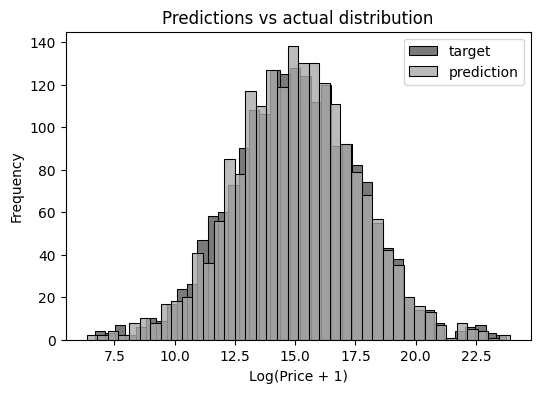

In [49]:
# Training a linear regression model w/o regularization
# 1. Fill with 0s
X_train_0, y_train_gt = prepare_data(df_train_0)
w0, w = train_linear_regression(X_train_0, y_train_gt)
y_train_pred = infer_linear_regression(X_train_0, w0, w)
print('Train RMSE (fill 0):', rmse(y_train_gt, y_train_pred))

# Predict on validation set
X_val_0, y_val_gt = prepare_data(df_val_0)
y_val_pred = infer_linear_regression(X_val_0, w0, w)
print('Val RMSE (fill 0):', rmse(y_val_gt, y_val_pred))

# Plot predictions vs actuals (validation set)
plt.figure(figsize=(6, 4))
sns.histplot(y_val_gt, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

Train RMSE (fill mean): 0.46
Val RMSE (fill mean): 0.46


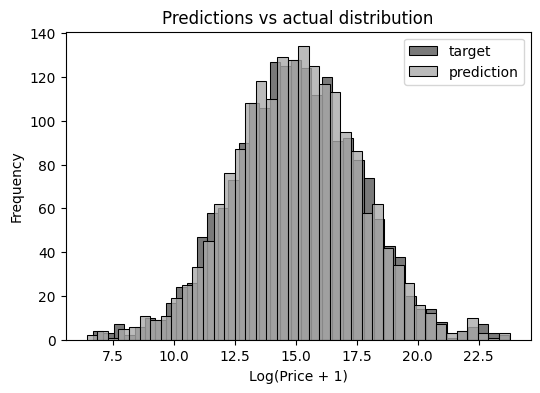

In [50]:
# 2. Fill with mean
X_train_mean, y_train_gt = prepare_data(df_train_mean)
w0, w = train_linear_regression(X_train_mean, y_train_gt)
y_train_pred = infer_linear_regression(X_train_mean, w0, w)
print('Train RMSE (fill mean):', rmse(y_train_gt, y_train_pred))

# Predict on validation set
X_val_mean, y_val_gt = prepare_data(df_val_mean)
y_val_pred = infer_linear_regression(X_val_mean, w0, w)
print('Val RMSE (fill mean):', rmse(y_val_gt, y_val_pred))

# Plot predictions vs actuals (validation set)
plt.figure(figsize=(6, 4))
sns.histplot(y_val_gt, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_val_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

**Answer:** filling with the mean value of `horsepower` improved model's performance (lower RMSE).

# 4. Regularized Linear Regression

In [51]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [55]:
X_train_0, y_train_gt = prepare_data(df_train_0)
X_val_0, y_val_gt = prepare_data(df_val_0)
RMSE_min = float('inf')
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Train the model
    w0, w = train_linear_regression_reg(X_train_0, y_train_gt, r=r)
    
    # Infer on train set
    y_train_pred = infer_linear_regression(X_train_0, w0, w)
    rmse_train = rmse(y_train_gt, y_train_pred, decimals=2)
    print('Train RMSE (r={}):'.format(r), rmse_train)

    # Infer on validation set
    y_val_pred = infer_linear_regression(X_val_0, w0, w)
    rmse_val = rmse(y_val_gt, y_val_pred, decimals=2)
    print('Val RMSE (r={}):'.format(r), rmse_val)

    # Keep best r -> use "<", such way that we get the smallest r in case of ties
    if rmse_val < RMSE_min:
        RMSE_min = rmse_val
        r_best = r

print('\nBest r:', r_best)


Train RMSE (r=0): 0.52
Val RMSE (r=0): 0.52
Train RMSE (r=0.01): 0.52
Val RMSE (r=0.01): 0.52
Train RMSE (r=0.1): 0.52
Val RMSE (r=0.1): 0.52
Train RMSE (r=1): 0.53
Val RMSE (r=1): 0.52
Train RMSE (r=5): 0.53
Val RMSE (r=5): 0.52
Train RMSE (r=10): 0.53
Val RMSE (r=10): 0.52
Train RMSE (r=100): 0.53
Val RMSE (r=100): 0.52

Best r: 0


# 5. Varying the seed

In [56]:
seeds = range(10)
rmse_list = []
for seed in seeds:
    # Perform index randomization
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    # 60/20/20 distribution
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    # Fill with 0s
    df_train_0 = df_train.fillna({'horsepower': 0})
    df_val_0 = df_val.fillna({'horsepower': 0})
    df_test_0 = df_test.fillna({'horsepower': 0})

    # Getting X and y columns
    X_train_0, y_train_gt = prepare_data(df_train_0)
    X_val_0, y_val_gt = prepare_data(df_val_0)

    # Train the model
    w0, w = train_linear_regression(X_train_0, y_train_gt)

    # Infer on validation set
    y_val_pred = infer_linear_regression(X_val_0, w0, w)
    rmse_val = rmse(y_val_gt, y_val_pred, decimals=2)
    rmse_list.append(rmse_val)

# Print standard deviation
print(np.std(rmse_list))
print('RMSE std:', round(np.std(rmse_list), 3))

0.007483314773547889
RMSE std: 0.007


# 6. Predicton on Test Set

In [58]:
# Perform index randomization
seed = 9
np.random.seed(seed)
idx = np.arange(n)
np.random.shuffle(idx)

# 60/20/20 distribution
n_test = int(0.2 * n)
n_train = n - n_test

df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

# Fill with 0s
df_train_0 = df_train.fillna({'horsepower': 0})
df_test_0 = df_test.fillna({'horsepower': 0})

# Getting X and y columns
X_train_0, y_train_gt = prepare_data(df_train_0)
X_test_0, y_test_gt = prepare_data(df_test_0)
# print(len(X_train_0), len(X_test_0))

# Train the model
w0, w = train_linear_regression_reg(X_train_0, y_train_gt, r=0.001)

# Infer on test set
y_test_pred = infer_linear_regression(X_test_0, w0, w)
rmse_test = rmse(y_test_gt, y_test_pred, decimals=3)
print('Test RMSE:', rmse_test)

Test RMSE: 0.516
